In [26]:
%load_ext autoreload
%autoreload 2

import os, sys, pickle
import numpy as np 
from tqdm import tqdm 
import matplotlib.pyplot as plt 

from bpreg.evaluation.visualization import plot_data 
from bpreg.settings import *
from bpreg.scripts.train import train_config, train_json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define Settings

In [27]:
# Define data paths
base_dir = "/media/lisa/HDD/Data/examples/"
data_path = os.path.join(base_dir, "npy/")
meta_data_path = os.path.join(base_dir, "meta_data.xlsx")
landmark_path = None

In [28]:
# Create config for training
params = {"df_data_source_path": meta_data_path, 
          "data_path": data_path, 
          "landmark_path": landmark_path, 
          "save_dir": os.path.join(base_dir, "output"), 
          "model_name": "BPR_MRT"}
          #"model": "SSBR",
          #"alpha": 15}
# define params for data augmentations
transform_params = TRANSFORM_STANDARD_PARAMS
transform_params["AddFrame"]["dimension"] = 128
params["transform_params"] = transform_params 
params["epochs"] = 50000

config = ModelSettings(**params)
print(config)

# save config as json 
config.save(os.path.join(base_dir, "bpr-config.json"))


BODY PART REGRESSION MODEL SETTINGS
*******************************************************
model_name                  :	BPR_MRT
name                        :	default.p
df_data_source_path         :	/media/lisa/HDD/Data/examples/meta_data.xlsx
data_path                   :	/media/lisa/HDD/Data/examples/npy/
landmark_path               :	None
save_dir                    :	/media/lisa/HDD/Data/examples/output
shuffle_train_dataloader    :	True
random_seed                 :	0
deterministic               :	True
save_model                  :	True
base_model                  :	vgg
*******************************************************
batch_size                  :	64
effective_batch_size        :	64
equidistance_range          :	[5, 100]
num_slices                  :	4
*******************************************************
alpha_h                     :	1
beta_h                      :	0.01
loss_order                  :	h
lambda_                     :	0
alpha                       :	0
lr  

## Visualize data

TRAINING DATA


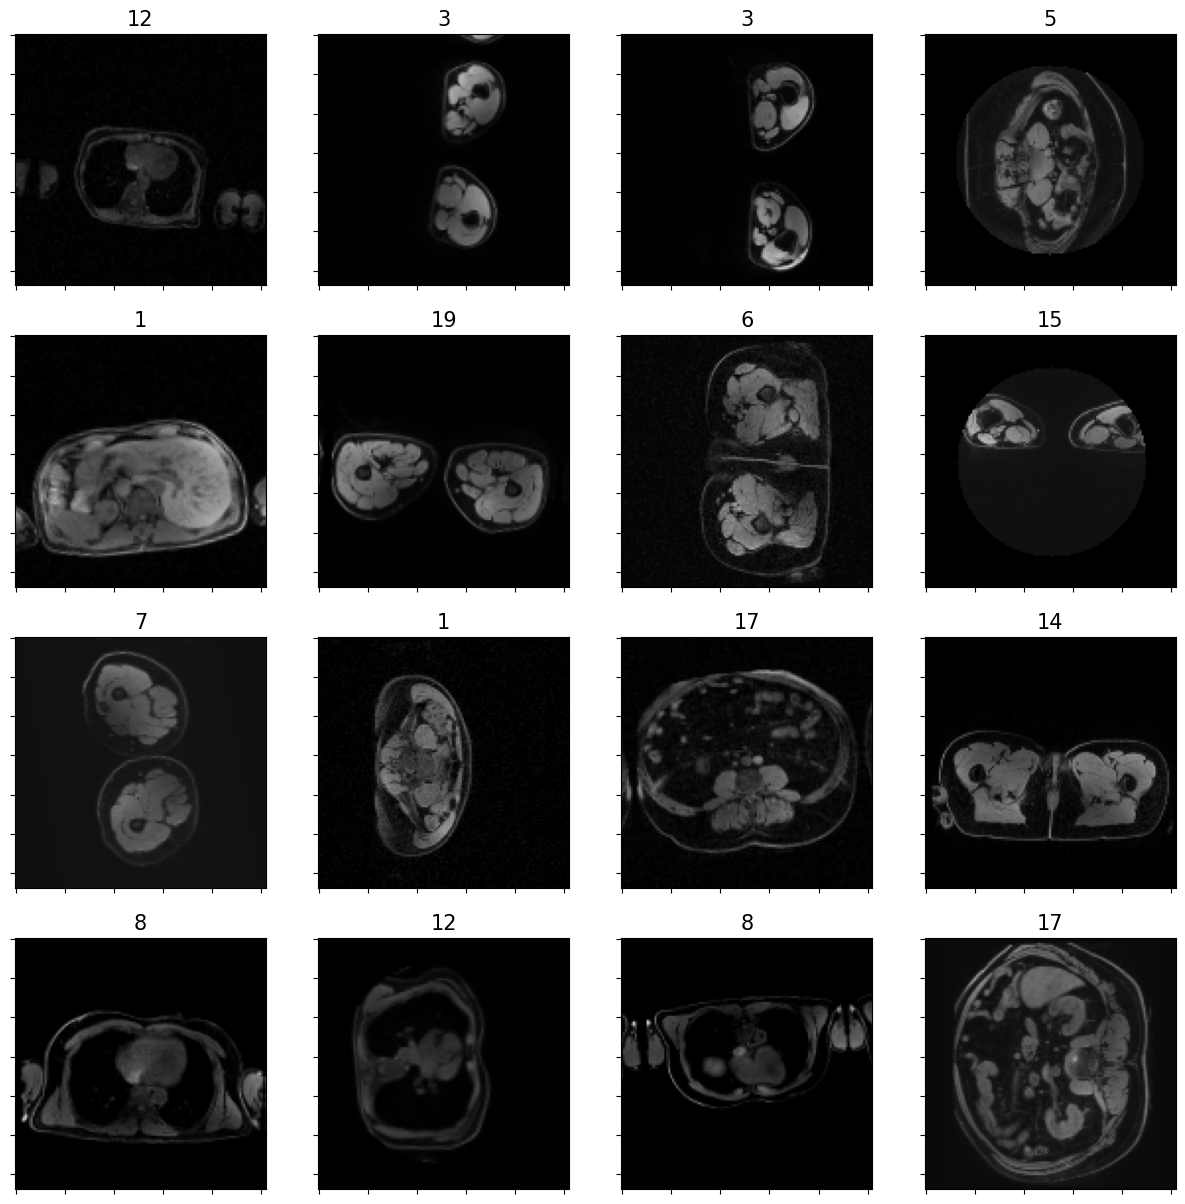

TEST DATA


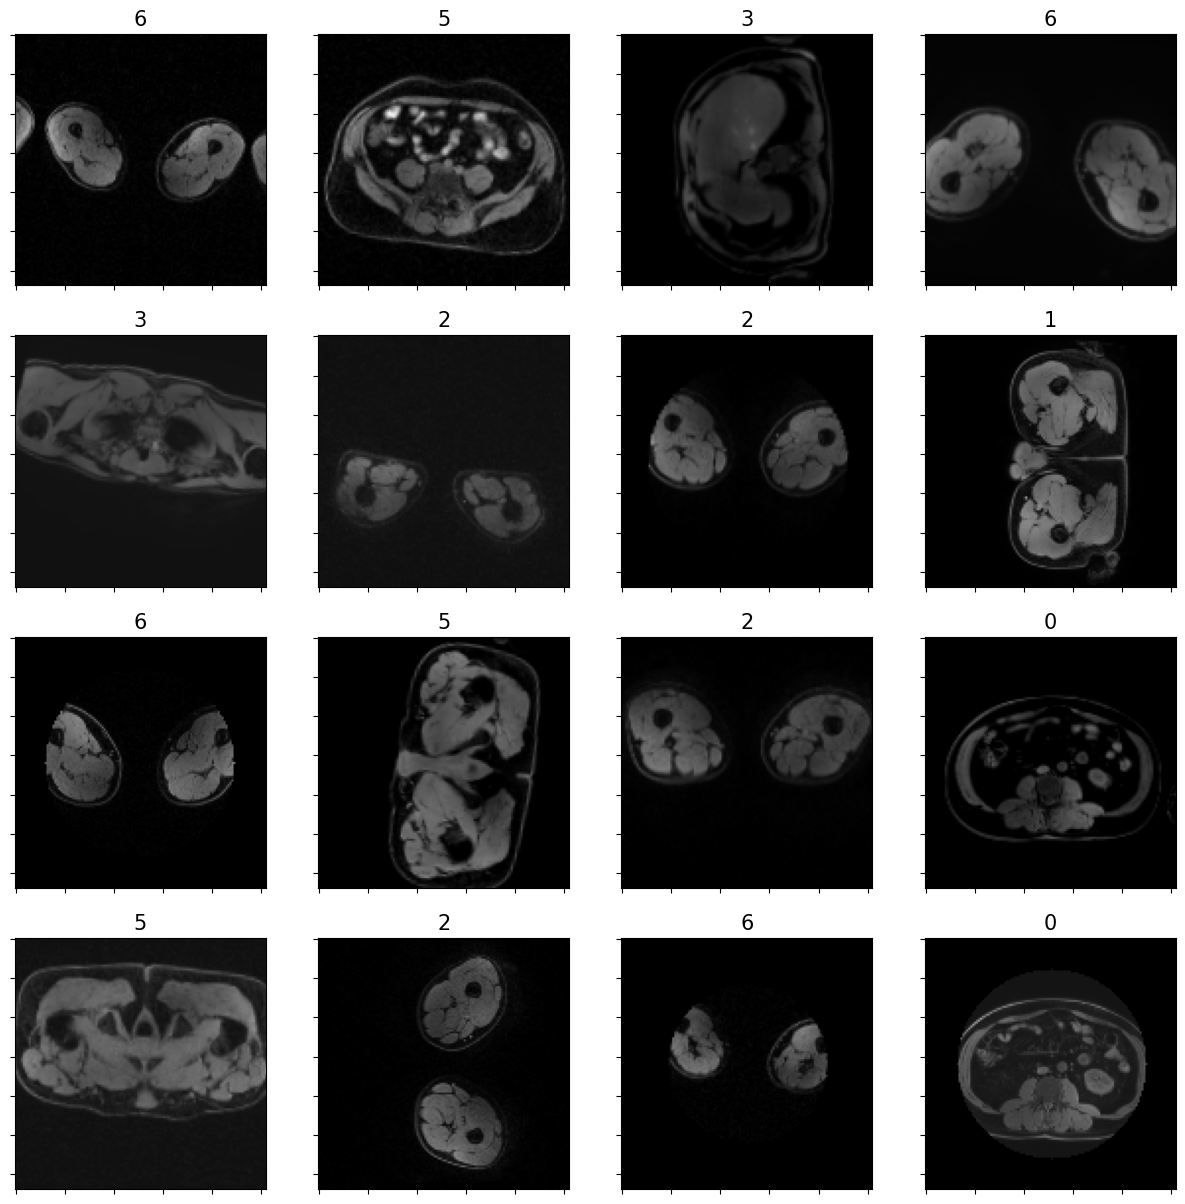

In [29]:
# plot training data 
print("TRAINING DATA")
plot_data(config, kind="train", cols=4, rows=4)
# plot test data 
print("TEST DATA")
plot_data(config, kind="test", cols=4, rows=4)

## Evaluation

In [30]:
# load model from checkpoint file
from bpreg.evaluation.evaluation import Evaluation

modelEval = Evaluation(os.path.join(base_dir, "output/BPR_MRT/version_8/"),
                       df_data_source_path=meta_data_path, 
                       landmark_path=None, #landmark_path,  
                       data_path=data_path, 
                       landmark_start=None, #"pelvis_start", 
                       landmark_end=None,
                       model_file="checkpoints/epoch=1918-step=1918.ckpt")

/home/lisa/anaconda3/envs/bpreg/lib/python3.9/site-packages/torch/utils/data/dataloader.py:474: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


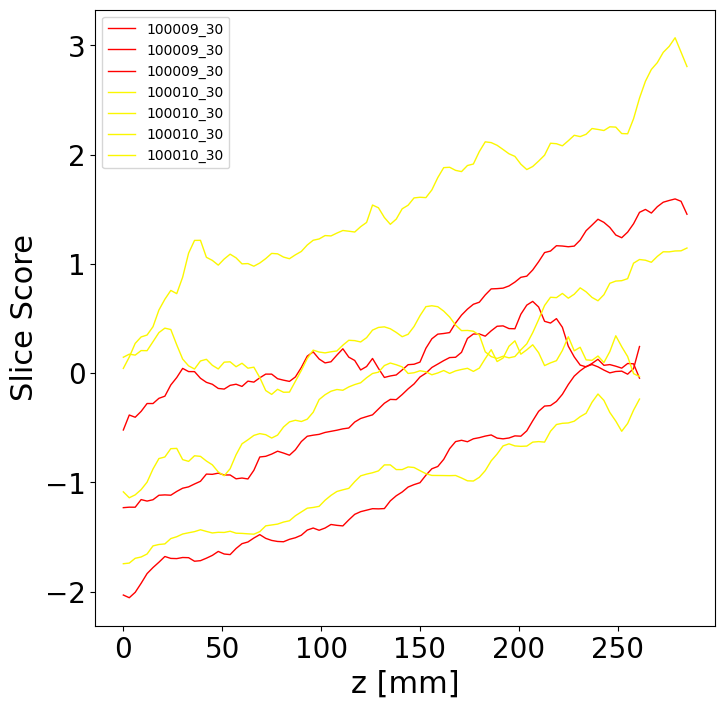

In [31]:
from bpreg.evaluation.evaluation_without_landmarks import ValidationVolume

vol = ValidationVolume(inference_model=modelEval.inference_model,
                       val_dataset=modelEval.test_dataset,
                       idx=list(np.arange(7)))
vol.plot_scores(set_figsize=(8, 8), legend=True, postprocess_volumes=True)

In [ ]:
nearby_values=np.linspace(-3, 3, 5)
print(f"plot slices from test set near scores: {nearby_values}")
modelEval.plot_slices2scores(max_cols=4, nearby_values=nearby_values, threshold_score=0.2)